## Synthetic Data Generation
NOTE - Run only on Jupyter Notebook not on VSCode

In [167]:
import numpy as np
import pandas as pd
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

### Student Data

In [31]:
# Define parameters
num_students = 1000
courses = ['Computer Science', 'Mechanical Engineering', 'Electrical Engineering', 'Civil Engineering', 'Aerospace Engineering', 'Chemical Engineering']
years = [1, 2, 3, 4]
interests = ['AI', 'Blockchain', 'Environmental Science', 'Robotics', 'Cybersecurity', 'Control Systems', 'Data Science','Fintech','Sustainability']
pairs = [f"{a}, {b}" for a, b in itertools.combinations(interests, 2)]
# Generate data
student_data = pd.DataFrame({
    'student_id': range(1, num_students + 1),
    'course': np.random.choice(courses, num_students),
    'year': np.random.choice(years, num_students),
    'interests': np.random.choice(pairs, num_students),
    'performance': np.random.randint(1, 101, num_students)  # performance between 50 and 100
})




In [179]:
student_data.head(10)

,student_id,course,year,interests,performance
0,1,Chemical Engineering,4,"Robotics, Fintech",32
1,2,Electrical Engineering,4,"Robotics, Control Systems",90
2,3,Civil Engineering,2,"Blockchain, Robotics",41
3,4,Civil Engineering,3,"Environmental Science, Data Science",28
4,5,Electrical Engineering,4,"Control Systems, Data Science",87
5,6,Chemical Engineering,1,"AI, Sustainability",43
6,7,Computer Science,4,"Environmental Science, Robotics",45
7,8,Civil Engineering,3,"AI, Blockchain",89
8,9,Computer Science,3,"Fintech, Sustainability",63
9,10,Civil Engineering,3,"Blockchain, Sustainability",3


### Material Data

In [34]:
num_materials = 500
subjects = ['AI', 'Blockchain', 'Environmental Science', 'Robotics', 'Cybersecurity', 'Control Systems', 'Data Science','Fintech','Sustainability']
difficulty_levels = ['easy', 'medium', 'hard']

material_data = pd.DataFrame({
    'material_id': range(1, num_materials + 1),
    'subject': np.random.choice(subjects, num_materials),
    'difficulty_level': np.random.choice(difficulty_levels, num_materials),
    'popularity_score': np.random.randint(0, 101, num_materials),  # score between 0 and 100
    'content_length': np.random.randint(10, 101, num_materials)  # length in minutes
})


In [180]:
material_data

,material_id,subject,difficulty_level,popularity_score,content_length
0,1,Robotics,hard,39,41
1,2,Robotics,easy,82,20
2,3,Cybersecurity,easy,99,91
3,4,Blockchain,easy,81,34
4,5,Robotics,hard,23,33
...,...,...,...,...,...
495,496,Sustainability,hard,37,100
496,497,Sustainability,easy,11,62
497,498,Blockchain,medium,89,32
498,499,Data Science,hard,71,14


### Engagement Data

In [61]:
num_engagements = 2000 

engagement_data = pd.DataFrame({
    'student_id': np.random.choice(student_data['student_id'], num_engagements),
    'material_id': np.random.choice(material_data['material_id'], num_engagements),
    'rating': np.random.randint(1, 6, num_engagements),  # rating between 1 and 5
    'viewed': np.random.choice([True, True], num_engagements)
})


In [26]:
# Assuming student_data and material_data already exist
num_engagements = 2000
probabilities = [0.15, 0.2, 0.3, 0.25, 0.1]
ratings = [1, 2, 3, 4, 5]

# Ensure each student has at least one rating
student_ratings = pd.DataFrame({
    'student_id': student_data['student_id'],
    'material_id': np.random.choice(material_data['material_id'], len(student_data)),
    'rating': np.random.choice(ratings, len(student_data), p=probabilities),
    'viewed': np.random.choice([True, True], len(student_data))
})

# Ensure each material has at least one rating
material_ratings = pd.DataFrame({
    'student_id': np.random.choice(student_data['student_id'], len(material_data)),
    'material_id': material_data['material_id'],
    'rating': np.random.choice(ratings, len(material_data), p=probabilities),
    'viewed': np.random.choice([True, True], len(material_data))
})

# Generate the remaining random engagements to reach the desired count
remaining_engagements = num_engagements - len(student_data) - len(material_data)
additional_engagements = pd.DataFrame({
    'student_id': np.random.choice(student_data['student_id'], remaining_engagements),
    'material_id': np.random.choice(material_data['material_id'], remaining_engagements),
    'rating': np.random.choice(ratings, remaining_engagements, p=probabilities),
    'viewed': np.random.choice([True, True], remaining_engagements)
})

# Concatenate all the engagements
engagement_data = pd.concat([student_ratings, material_ratings, additional_engagements], ignore_index=True)
engagement_data = engagement_data.sort_values(by='student_id').reset_index(drop=True)

In [181]:
(engagement_data.head(10))

,student_id,material_id,rating,viewed
0,1,454,2,True
1,2,282,4,True
2,2,97,4,True
3,2,294,3,True
4,2,314,3,True
5,2,479,1,True
6,3,119,3,True
7,3,224,4,True
8,4,458,5,True
9,4,381,3,True


In [28]:
engagement_data['material_id'].value_counts()

material_id
272    11
437    10
102    10
39     10
166    10
       ..
321     1
130     1
263     1
29      1
375     1
Name: count, Length: 500, dtype: int64

In [29]:
engagement_data['rating'].value_counts()

rating
3    612
4    542
2    347
1    309
5    190
Name: count, dtype: int64

In [30]:
engagement_data['student_id'].value_counts()

student_id
661    7
581    6
349    5
318    5
256    5
      ..
230    1
729    1
728    1
727    1
1      1
Name: count, Length: 1000, dtype: int64

In [31]:
# engagement_data.to_csv('synthetic_engagement_data.csv', index=False)

In [65]:
# student_data.to_csv('synthetic_student_data.csv', index=False)
# material_data.to_csv('synthetic_material_data.csv', index=False)
# engagement_data.to_csv('synthetic_engagement_data.csv', index=False)


## Data Analysis

In [178]:
student_data = pd.read_csv('synthetic_student_data.csv')
material_data = pd.read_csv('synthetic_material_data.csv')
engagement_data = pd.read_csv('synthetic_engagement_data.csv')

In [4]:
def to_unit_vector(vec):
    return vec / np.linalg.norm(vec)
    
def generate_vector(value):
    if value < 40:
        return to_unit_vector(np.array([2.5, 2, 1]))
    elif 40 <= value <= 70:
        return to_unit_vector(np.array([1, 2.5, 2]))
    else:
        return to_unit_vector(np.array([1, 1, 1]))

def difficulty_to_vector(value):
    if value == 'easy':
        return np.array([1, 0, 0])
    elif value == 'medium':
        return np.array([0, 1, 0])
    elif value == 'hard':
        return np.array([0, 0, 1])

In [5]:
student_data['difficulty_vector'] = student_data['performance'].apply(generate_vector)

In [6]:
material_data['difficulty_level_vector'] = material_data['difficulty_level'].apply(difficulty_to_vector)

In [7]:
student_data.head(10)

,student_id,course,year,interests,performance,difficulty_vector
0,1,Chemical Engineering,4,"Robotics, Fintech",32,"[0.7453559924999299, 0.5962847939999439, 0.298..."
1,2,Electrical Engineering,4,"Robotics, Control Systems",90,"[0.5773502691896258, 0.5773502691896258, 0.577..."
2,3,Civil Engineering,2,"Blockchain, Robotics",41,"[0.29814239699997197, 0.7453559924999299, 0.59..."
3,4,Civil Engineering,3,"Environmental Science, Data Science",28,"[0.7453559924999299, 0.5962847939999439, 0.298..."
4,5,Electrical Engineering,4,"Control Systems, Data Science",87,"[0.5773502691896258, 0.5773502691896258, 0.577..."
5,6,Chemical Engineering,1,"AI, Sustainability",43,"[0.29814239699997197, 0.7453559924999299, 0.59..."
6,7,Computer Science,4,"Environmental Science, Robotics",45,"[0.29814239699997197, 0.7453559924999299, 0.59..."
7,8,Civil Engineering,3,"AI, Blockchain",89,"[0.5773502691896258, 0.5773502691896258, 0.577..."
8,9,Computer Science,3,"Fintech, Sustainability",63,"[0.29814239699997197, 0.7453559924999299, 0.59..."
9,10,Civil Engineering,3,"Blockchain, Sustainability",3,"[0.7453559924999299, 0.5962847939999439, 0.298..."


In [154]:
student_data.shape

(1000, 6)

In [155]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   student_id         1000 non-null   int64 
 1   course             1000 non-null   object
 2   year               1000 non-null   int64 
 3   interests          1000 non-null   object
 4   performance        1000 non-null   int64 
 5   difficulty_vector  1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


In [156]:
student_data.isnull().sum()

student_id           0
course               0
year                 0
interests            0
performance          0
difficulty_vector    0
dtype: int64

In [157]:
student_data.describe()

,student_id,year,performance
count,1000.000000,1000.000000,1000.000000
mean,500.500000,2.586000,49.024000
std,288.819436,1.107172,29.140704
min,1.000000,1.000000,1.000000
25%,250.750000,2.000000,23.000000
50%,500.500000,3.000000,47.000000
75%,750.250000,4.000000,75.000000
max,1000.000000,4.000000,100.000000


<Axes: xlabel='count', ylabel='course'>

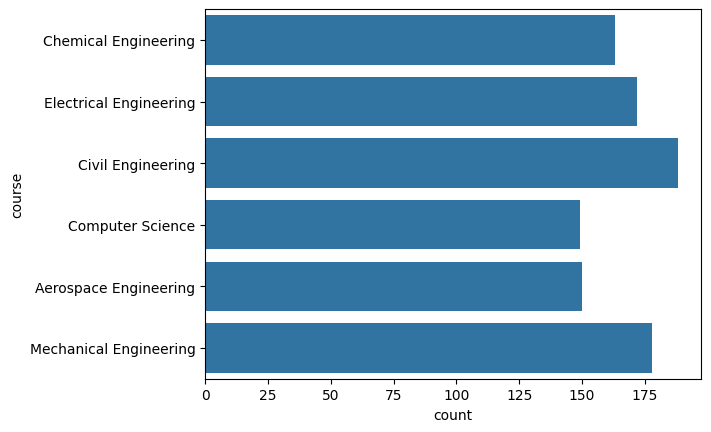

In [166]:
sns.countplot(student_data['course'])

(array([38., 24., 42., 39., 39., 39., 51., 29., 28., 28., 49., 26., 23.,
        50., 30., 25., 36., 32., 20., 31., 29., 29., 24., 46., 30., 22.,
        37., 32., 27., 45.]),
 array([  1. ,   4.3,   7.6,  10.9,  14.2,  17.5,  20.8,  24.1,  27.4,
         30.7,  34. ,  37.3,  40.6,  43.9,  47.2,  50.5,  53.8,  57.1,
         60.4,  63.7,  67. ,  70.3,  73.6,  76.9,  80.2,  83.5,  86.8,
         90.1,  93.4,  96.7, 100. ]),
 <BarContainer object of 30 artists>)

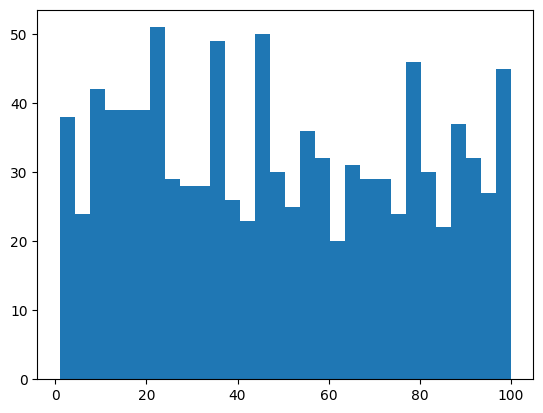

In [170]:
plt.hist(student_data['performance'],bins=30)

C:\Users\hp\AppData\Local\Temp\ipykernel_18164\3740407527.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(student_data['performance'])


<Axes: xlabel='performance', ylabel='Density'>

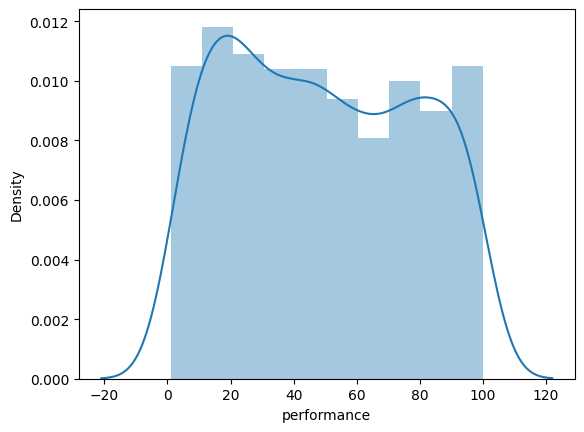

In [173]:
sns.distplot(student_data['performance'])

In [8]:
material_data.head(10)

,material_id,subject,difficulty_level,popularity_score,content_length,difficulty_level_vector
0,1,Robotics,hard,39,41,"[0, 0, 1]"
1,2,Robotics,easy,82,20,"[1, 0, 0]"
2,3,Cybersecurity,easy,99,91,"[1, 0, 0]"
3,4,Blockchain,easy,81,34,"[1, 0, 0]"
4,5,Robotics,hard,23,33,"[0, 0, 1]"
5,6,Cybersecurity,medium,53,40,"[0, 1, 0]"
6,7,Blockchain,easy,1,95,"[1, 0, 0]"
7,8,AI,medium,56,99,"[0, 1, 0]"
8,9,Fintech,hard,89,62,"[0, 0, 1]"
9,10,Cybersecurity,hard,1,62,"[0, 0, 1]"


In [159]:
material_data.shape

(500, 6)

In [160]:
material_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   material_id              500 non-null    int64 
 1   subject                  500 non-null    object
 2   difficulty_level         500 non-null    object
 3   popularity_score         500 non-null    int64 
 4   content_length           500 non-null    int64 
 5   difficulty_level_vector  500 non-null    object
dtypes: int64(3), object(3)
memory usage: 23.6+ KB


In [161]:
material_data.describe()

,material_id,popularity_score,content_length
count,500.000000,500.000000,500.00000
mean,250.500000,52.056000,56.22600
std,144.481833,29.610986,25.99944
min,1.000000,0.000000,10.00000
25%,125.750000,27.000000,34.00000
50%,250.500000,53.500000,58.00000
75%,375.250000,79.000000,79.00000
max,500.000000,100.000000,100.00000


<Axes: xlabel='count', ylabel='difficulty_level'>

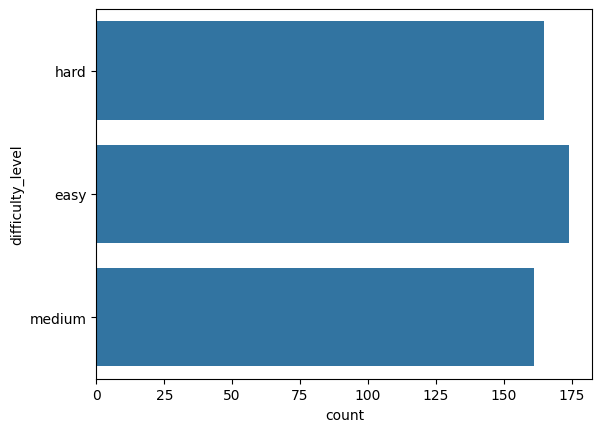

In [175]:
sns.countplot(material_data['difficulty_level'])

C:\Users\hp\AppData\Local\Temp\ipykernel_18164\1464446891.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(material_data['popularity_score'])


<Axes: xlabel='popularity_score', ylabel='Density'>

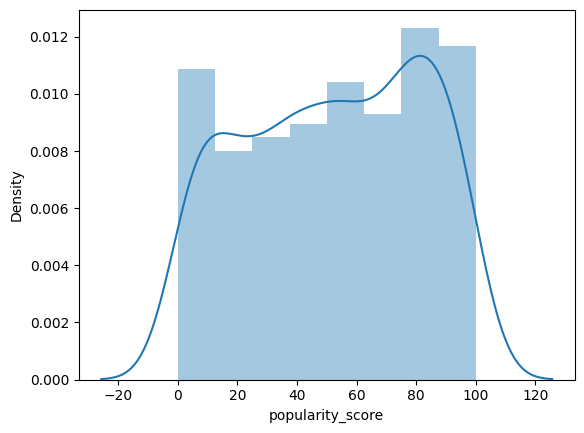

In [174]:
sns.distplot(material_data['popularity_score'])

## Content Based Filtering

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Creating a TF-IDF vectorizer for student interests and material subjects
tfidf = TfidfVectorizer(stop_words='english')

# Combining student interests and material subjects
student_interests = student_data['interests'].values
material_subjects = material_data['subject'].values
popularity = material_data['popularity_score'].to_numpy()
popularity = popularity.reshape(500,1)

interest_matrix = tfidf.fit_transform(student_interests)
subject_matrix = tfidf.transform(material_subjects)
subject_matrix = subject_matrix.toarray()

## Effect of popularity of course on subject_matrix
subject_matrix = subject_matrix*popularity*0.01

## Effect of difficulty
d_vector = student_data['difficulty_vector'].values
d_l_vector = material_data['difficulty_level_vector'].values
level_similarity = np.zeros((d_vector.size,d_l_vector.size))
for i in range(d_vector.size):
    for j in range(d_l_vector.size):
        level_similarity[i, j] = np.dot(d_vector[i], d_l_vector[j])

l_s_norm = ( level_similarity - level_similarity.min() )/( level_similarity.max() - level_similarity.min() )

content_similarity = cosine_similarity(interest_matrix, subject_matrix)
c_s_norm = (content_similarity - content_similarity.min()) / ( content_similarity.max() - content_similarity.min() )

# Add the effect of difficulty 
lamd = 0.3
effective_similarity = (1-lamd)*c_s_norm + lamd*l_s_norm


In [92]:
content_sim_df = pd.DataFrame(effective_similarity, index=student_data['student_id'], columns=material_data['material_id'])

In [93]:
content_sim_df.head(10)

material_id,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
student_id,,,,,,,,,,,,,,,,,,,,,
1,0.585367,0.885367,0.300000,0.300000,0.585367,0.200000,0.300000,0.200000,0.610401,0.000000,...,0.000000,0.585367,0.000000,0.000000,0.300000,0.000000,0.300000,0.200000,0.000000,0.610401
2,0.673846,0.673846,0.187298,0.187298,0.673846,0.187298,0.187298,0.187298,0.187298,0.187298,...,0.187298,0.673846,0.187298,0.879047,0.187298,0.187298,0.187298,0.187298,0.187298,0.187298
3,0.796424,0.596424,0.000000,0.599602,0.796424,0.300000,0.599602,0.300000,0.200000,0.200000,...,0.799602,0.796424,0.200000,0.200000,0.000000,0.200000,0.000000,0.899602,0.200000,0.200000
4,0.000000,0.300000,0.300000,0.300000,0.000000,0.200000,0.300000,0.200000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.300000,0.000000,0.300000,0.200000,0.696220,0.000000
5,0.187298,0.187298,0.187298,0.187298,0.187298,0.187298,0.187298,0.187298,0.187298,0.187298,...,0.187298,0.187298,0.187298,0.817938,0.187298,0.187298,0.187298,0.187298,0.750803,0.187298
6,0.200000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.896956,0.200000,0.200000,...,0.200000,0.200000,0.796956,0.200000,0.599072,0.799072,0.599072,0.300000,0.200000,0.200000
7,0.719354,0.519354,0.000000,0.000000,0.719354,0.300000,0.000000,0.300000,0.200000,0.200000,...,0.200000,0.719354,0.200000,0.200000,0.000000,0.200000,0.000000,0.300000,0.442154,0.200000
8,0.187298,0.187298,0.187298,0.786900,0.187298,0.187298,0.786900,0.783722,0.187298,0.187298,...,0.786900,0.187298,0.783722,0.187298,0.187298,0.187298,0.187298,0.786900,0.187298,0.187298
9,0.200000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.300000,0.809365,0.200000,...,0.200000,0.200000,0.200000,0.200000,0.586445,0.786445,0.586445,0.300000,0.200000,0.809365


## Neural Collaborative Filtering

In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model

In [44]:
# This step is done in case if IDs are in any different form (eg. 'AD1209')
# In the data used here this step is not necessary, but done for consistency 
user_ids = engagement_data['student_id'].unique().tolist()
item_ids = engagement_data['material_id'].unique().tolist()

user_to_index = {user: idx for idx, user in enumerate(user_ids)}
item_to_index = {item: idx for idx, item in enumerate(item_ids)}

engagement_data['user_index'] = engagement_data['student_id'].map(user_to_index)
engagement_data['item_index'] = engagement_data['material_id'].map(item_to_index)

n_users = len(user_ids)
n_items = len(item_ids)


In [37]:
def create_ncf_model(n_users, n_items):
    user_input = Input(shape=(1,), name='user_input')
    item_input = Input(shape=(1,), name='item_input')

    ## GMF part
    user_embedding_gmf = Embedding(input_dim=n_users, output_dim=8)(user_input)
    item_embedding_gmf = Embedding(input_dim=n_items, output_dim=8)(item_input)
    
    # Flattenning the embeddings for GMF
    user_vecs_gmf = Flatten()(user_embedding_gmf)
    item_vecs_gmf = Flatten()(item_embedding_gmf)

    # Element-wise multiplication for GMF
    gmf_output = tf.multiply(user_vecs_gmf, item_vecs_gmf)

    ## MLP part
    user_embedding_mlp = Embedding(input_dim=n_users, output_dim=8)(user_input)
    item_embedding_mlp = Embedding(input_dim=n_items, output_dim=8)(item_input)

    # Flattening the embeddings for MLP
    user_vecs_mlp = Flatten()(user_embedding_mlp)
    item_vecs_mlp = Flatten()(item_embedding_mlp)

    # Concatenating embeddings for MLP
    concat_mlp = Concatenate()([user_vecs_mlp, item_vecs_mlp])

    # MLP layers
    x_mlp = Dense(64, activation='relu')(concat_mlp)
    x_mlp = Dense(32, activation='relu')(x_mlp)
    
    # Final output layer combining GMF and MLP outputs
    combined_output = Concatenate()([gmf_output, x_mlp])
    output = 5*Dense(1,activation='sigmoid')(combined_output) # scaled as rating ranges from 0 to 5
    model = Model(inputs=[user_input, item_input], outputs=output)
    
    return model

In [59]:
model = create_ncf_model(n_users, n_items)
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
# X_train = [engagement_data['user_index'].values, engagement_data['item_index'].values]
# y_train = engagement_data['rating'].values
X_train = [engagement_data['student_id'].values, engagement_data['material_id'].values]
y_train = engagement_data['rating'].values

In [75]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
63/63 [==============================] - 1s 10ms/step - loss: 1.7094
Epoch 2/100
63/63 [==============================] - 1s 9ms/step - loss: 1.1822
Epoch 3/100
63/63 [==============================] - 1s 10ms/step - loss: 0.8381
Epoch 4/100
63/63 [==============================] - 1s 9ms/step - loss: 0.5333
Epoch 5/100
63/63 [==============================] - 1s 9ms/step - loss: 0.3368
Epoch 6/100
63/63 [==============================] - 1s 8ms/step - loss: 0.2176
Epoch 7/100
63/63 [==============================] - 1s 8ms/step - loss: 0.1453
Epoch 8/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0987
Epoch 9/100
63/63 [==============================] - 1s 10ms/step - loss: 0.0739
Epoch 10/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0569
Epoch 11/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0452
Epoch 12/100
63/63 [==============================] - 1s 8ms/step - loss: 0.0372
Epoch 13/100
63/63 [==============

In [77]:
def predict_rating(user_id, item_id):
    # user_idx = user_to_index[user_id]
    # item_idx = item_to_index[item_id]
    
    return model.predict([np.array([user_id]), np.array([item_id])])
    
def predict_ratings(user_ids, item_ids):
    # user_idx = user_to_index[user_id]
    # item_idx = item_to_index[item_id]
    user_input = np.array(user_ids).reshape(-1, 1)  # Reshape for batch input
    item_input = np.array(item_ids).reshape(-1, 1)  # Reshape for batch input
    
    return model.predict([user_input, item_input])

In [84]:
predicted_rating = predict_rating(5, 5)
print(f'Predicted rating: {predicted_rating[0][0]:.2f}')

1/1 [==============================] - 0s 88ms/step
Predicted rating: 3.17


In [86]:
utility_matrix = np.zeros((n_users,n_items))
for user_idx, user_id in enumerate(user_ids):
    item_ids_for_user = sorted(item_ids) 
    user_indices = [user_id] * len(item_ids_for_user) 
    predicted_ratings = predict_ratings(user_indices, item_ids_for_user)  
    

    utility_matrix[user_idx] = predicted_ratings.flatten() 

16/16 [==============================] - 0s 3ms/step


In [ ]:
u_m_norm = (utility_matrix - utility_matrix.min())/( utility_matrix.max() - utility_matrix.min() )

## Final recommendation

Combining the content based filtering and neural collaborative filtering

In [94]:
alpha = 0.7
final_utility_matrix = alpha*effective_similarity + (1-alpha)*u_m_norm

In [95]:
recommended = pd.DataFrame(final_utility_matrix, index=student_data['student_id'], columns=material_data['material_id'])
recommended

material_id,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
student_id,,,,,,,,,,,,,,,,,,,,,
1,0.572649,0.795500,0.456103,0.393763,0.504765,0.341349,0.339045,0.329955,0.531531,0.119207,...,0.235834,0.551204,0.258477,0.248480,0.343711,0.273389,0.401787,0.352504,0.177817,0.599291
2,0.604532,0.650118,0.385677,0.337059,0.654377,0.226588,0.280827,0.328857,0.266448,0.214744,...,0.395109,0.596130,0.339612,0.825638,0.285938,0.374872,0.272070,0.277632,0.335266,0.301305
3,0.673452,0.481312,0.215296,0.569854,0.666925,0.387298,0.506483,0.462263,0.178978,0.210815,...,0.797741,0.665370,0.401568,0.357953,0.095488,0.424383,0.177603,0.743535,0.359099,0.304809
4,0.263779,0.350916,0.498958,0.416831,0.260338,0.389269,0.452302,0.358319,0.236019,0.208371,...,0.280231,0.232517,0.282196,0.278740,0.437207,0.294485,0.418446,0.420196,0.729748,0.243927
5,0.228831,0.306797,0.390470,0.308805,0.319062,0.270952,0.225500,0.328936,0.281306,0.225189,...,0.339978,0.346319,0.341063,0.775222,0.333063,0.380864,0.293992,0.314142,0.700733,0.304124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,0.133954,0.410064,0.441690,0.370966,0.147288,0.239584,0.367771,0.263243,0.158192,0.081821,...,0.220393,0.120760,0.088433,0.584857,0.381038,0.175777,0.295368,0.266168,0.283633,0.129702
997,0.273692,0.359362,0.390422,0.343157,0.366910,0.312882,0.260597,0.371173,0.706449,0.253395,...,0.372663,0.378216,0.373132,0.815331,0.375085,0.396462,0.339094,0.336649,0.352078,0.702054
998,0.258481,0.169348,0.596094,0.127373,0.269039,0.812262,0.066592,0.310886,0.800166,0.628677,...,0.272050,0.246235,0.287330,0.272461,0.149659,0.419022,0.159490,0.317897,0.266693,0.682788


In [177]:
top_recommendations = np.argsort(final_utility_matrix,axis=1)[:,::-1]
top_recommendations

array([[ 47, 379,  40, ..., 386, 324, 168],
       [476, 205, 422, ...,  71, 468, 478],
       [451, 218,  76, ..., 347, 468, 129],
       ...,
       [310,   5, 336, ..., 234, 377, 315],
       [ 79, 385,  55, ..., 264, 221,  43],
       [402, 113,  59, ..., 159, 235,   9]], dtype=int64)

If the user has already intracted with that course then place that course last(so it will not be recommended)

In [146]:
# Function to reorder courses based on engagement data
def reorder_courses(utility_matrix, engagement_data):
    num_students, num_courses = utility_matrix.shape

    for student_id in range(num_students):
        engaged_courses = engagement_data[engagement_data['studentId'] == student_id]['courseId'].values
        
        current_row = utility_matrix[student_id]
        engaged_in_row = [course for course in current_row if course in engaged_courses]
        non_engaged_courses = [course for course in current_row if course not in engaged_in_row]
        new_row = non_engaged_courses + engaged_in_row
        new_row = new_row + [0] * (num_courses - len(new_row))
        utility_matrix[student_id] = new_row
    
    return utility_matrix


In [150]:
# Reorder the utility matrix
top_refined = reorder_courses(top_recommendations, engagement_data)
top_n = 5
top_n_refined = top_refined[:,0:top_n]

In [151]:
recommendations = pd.DataFrame(top_n_refined,index=student_data['student_id'], columns=['Recommended 1','Recommended 2',
                                                                                                'Recommended 3','Recommended 4','Recommended 5'])
recommendations

,Recommended 1,Recommended 2,Recommended 3,Recommended 4,Recommended 5
student_id,,,,,
1,47,379,40,475,116
2,476,205,422,437,155
3,451,218,76,86,120
4,312,463,113,103,61
5,318,175,476,137,437
...,...,...,...,...,...
996,422,402,318,175,146
997,318,422,429,175,137
998,310,5,336,363,8


### Evaluation

Evaluation metrics such as MAP@K, NDCG can be used to eavaluate the performance of the model